# 🚜 Predicting the sale price of bulldozers using machine learning 🚜

In this notebook, we´re going to go through an example of machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition

 > How well can we predict the future sale price of a bulldozer, given it's characteristics and previous examples of how much similar bulldozers have been sold for?
 
 

## 2. Data

The data is downloaded from the kaggle Bluebook for Bulldozers competition:https://www.kaggle.com/c/bluebook-for-bulldozers

There are 3 data sets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal will be to build a machine learning model which minimises RMLSE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# import data

df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

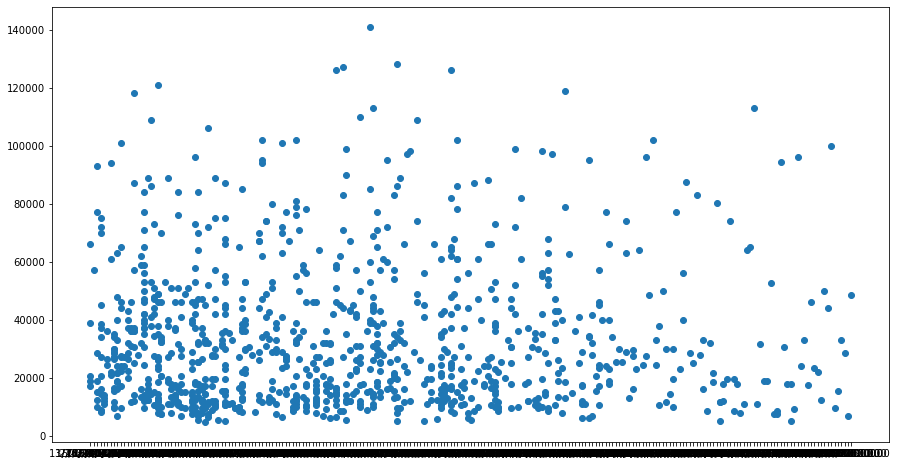

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])


<AxesSubplot:ylabel='Frequency'>

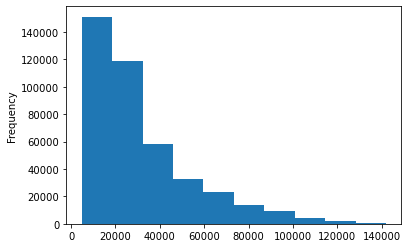

In [7]:
df['SalePrice'].plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time & date components as much as possible.


We can do that by telling pandas which of our columns has dates in it using `parse_dates` parameter

In [8]:
# import data again but this time parse dates
df = pd.read_csv('data/TrainAndValid.csv', parse_dates=['saledate'], low_memory=False)

In [9]:
df['saledate'].dtype

dtype('<M8[ns]')

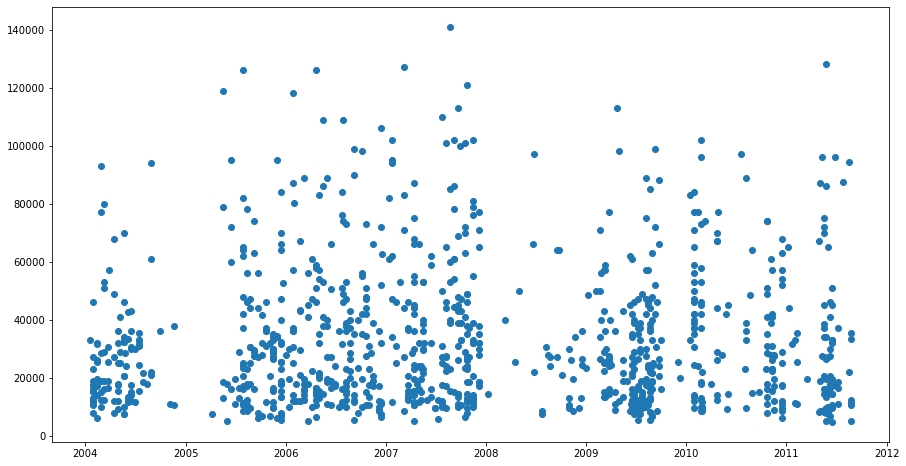

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);


In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort dataframe by saledate

When working with time series data, it's a good idea to sort it by date.


In [13]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)


### Make a copy of the original DataFrame

We've make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [14]:
df_tmp = df.copy()

In [15]:
### Add datetime parameters for `saledate` parameter 

In [16]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear


In [17]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
# Now we're enrich our dataframe with date time features, can drop saletime

df_tmp.drop('saledate', axis=1, inplace=True)


In [19]:
df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling 

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA

In [20]:
# # Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# X = df_tmp.drop('SalePrice', axis=1)
# y = df_tmp['SalePrice']

# model.fit(X, y)

In [21]:
df['UsageBand'].head()

205615    NaN
274835    NaN
141296    NaN
212552    NaN
62755     NaN
Name: UsageBand, dtype: object

### Filling missing values

#### Fill numeric missing values first

In [22]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [23]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

auctioneerID
MachineHoursCurrentMeter


In [24]:
# fill with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        df_tmp[label + '_is_missing'] = pd.isnull(content)
        df_tmp[label] = content.fillna(content.median())

In [25]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

### convert string to categories

One way can turn all of our data into numbers is by converting them into pandas categories.

In [26]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content) and pd.isnull(content).sum():
        print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
# turn strings to category
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category


In [29]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### save

In [30]:
df_tmp.to_csv('data/train_tmp.csv', index=False)

In [31]:
df_tmp = pd.read_csv('data/train_tmp.csv', low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [32]:
# turn strings to category
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category
 11  

### Filling and turning categorical variables into numbers

In [34]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [36]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+'_is_missing']  = pd.isnull(content)
        # Turn categories into numbers and add + 1
        df_tmp[label] = pd.Categorical(content).codes + 1
        #print(label)

In [37]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [38]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [39]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [40]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [41]:
df_tmp['state'].value_counts()

9     67320
44    53110
5     29761
49    16222
10    14633
20    13322
24    13240
35    12369
13    11540
6     11529
30    11156
33    10636
43    10298
1     10292
38    10234
41     9951
3      9364
32     8639
7      8276
23     7885
25     7178
28     6932
18     6627
17     5351
19     5096
14     4124
4      3933
31     3631
46     3046
45     2801
52     2745
29     2738
48     2353
12     2025
37     1911
22     1831
53     1672
26     1336
15     1336
36     1326
27      866
51      840
16      667
8       510
34      480
2       430
21      347
47      300
42      244
11      118
40       83
39       42
50        2
Name: state, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [42]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42)
X = df_tmp.drop('SalePrice', axis=1)
y = df_tmp['SalePrice']
model.fit(X, y)

Wall time: 7min 29s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
# Score the model

model.score(X, y)

0.9875468079970562

### Splitting data into train/validation sets

In [44]:
df_tmp['saleYear']

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [45]:
df_tmp['saleYear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [46]:
df_val = df_tmp[df_tmp['saleYear'] == 2012]

df_train = df_tmp[df_tmp['saleYear'] != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [47]:
df_val

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
401125,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,0,2269,...,True,True,True,True,True,False,False,False,True,True
401126,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,2,85,...,True,True,True,True,True,True,True,True,True,True
401127,6258613,26800.0,1810917,13260,149,99.0,2000,24.0,2,1115,...,True,True,True,True,True,True,True,True,True,True
401128,6282680,42100.0,1543404,1830,149,99.0,2004,4373.0,3,64,...,False,False,False,False,False,True,True,True,True,True
401129,6282759,62100.0,1863077,11390,149,99.0,2006,3467.0,3,139,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [48]:
%%time
# Split data and X & y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

model.fit(X_train, y_train)

model.score(X_valid, y_valid)

Wall time: 8min 19s


0.8727175969771312

In [49]:
# Create own evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rlmse(y_test, y_preds):
    
    """
    Calculates root mean squared log error between predictions and true labels
    """
    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        "Training MAE":mean_absolute_error(y_train, train_preds),
        "Valid MAE" : mean_absolute_error(y_valid, val_preds),
        "training RLMSE" : rlmse(y_train, train_preds),
        'Valid RLMSE' : rlmse(y_valid, val_preds),
        'Training R^2' : r2_score(y_train, train_preds),
        'Valid R^2' : r2_score(y_valid, val_preds)
        
    }
    return scores

In [50]:
show_scores(model)


{'Training MAE': 1578.2015208725463,
 'Valid MAE': 6120.959637950402,
 'training RLMSE': 0.08426351714047395,
 'Valid RLMSE': 0.25557446689440955,
 'Training R^2': 0.9875150955953674,
 'Valid R^2': 0.8727175969771312}

## Testing our model on a subset (to tune the hyperparameters)

In [51]:
# %%time
# model = RandomForestRegressor(n_jobs=-1, random_state=42)

# model.fit(X_train, y_train)

In [52]:
model = RandomForestRegressor(n_jobs=-1 , random_state=42, max_samples=10000)


In [53]:
%%time
model.fit(X_train, y_train)

Wall time: 21 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [54]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'training RLMSE': 0.257745378256977,
 'Valid RLMSE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tunning with RandomizedSearchCV

In [55]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
   'n_estimators':np.arange(10, 100, 10),
    'max_depth' : [None, 3, 5, 10],
    'min_samples_split' : np.arange(2,20,2),
    'min_samples_leaf' : np.arange(2,20,2),
    'max_features' : [0.5, 1, 'sqrt', 'auto'],
    'max_samples' : [10000]
}


rs_rf = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), 
                           param_distributions=rf_grid, 
                           n_iter=5, 
                           cv=5, 
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 3min 28s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [56]:
rs_rf.score(X_valid, y_valid)

0.7931288183718525

In [57]:
rs_rf.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [58]:
show_scores(rs_rf)

{'Training MAE': 6982.218401903717,
 'Valid MAE': 8096.401331569155,
 'training RLMSE': 0.3099577035189044,
 'Valid RLMSE': 0.3267630854570203,
 'Training R^2': 0.7924152288302828,
 'Valid R^2': 0.7931288183718525}

### Train a model with the best hyperparameters 

**Note:** These was found after 100 iterations of `RandomizedSearchCV`

In [60]:
%%time
# Most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=1,
                                    max_samples=None,
                                    random_state=42
                                   )

ideal_model.fit(X_train, y_train)

Wall time: 2min 28s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=1)

In [61]:
show_scores(ideal_model)

{'Training MAE': 2959.666683818414,
 'Valid MAE': 5967.857473238665,
 'training RLMSE': 0.14475596733922477,
 'Valid RLMSE': 0.24638226833038981,
 'Training R^2': 0.9587382883707537,
 'Valid R^2': 0.8810160862519}

## Make predicitons on test data

In [63]:
df_test = pd.read_csv('data/Test.csv', low_memory=False, parse_dates=['saledate'])
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


# Preprocessing the data (TEST FORMAT)

In [66]:
def preprocess_data(df):
    """ 
    Performs transformations on df and returns transformed df
    """
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear
    df.drop('saledate', axis=1, inplace=True)
    
    #numeric data missing values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            df[label + '_is_missing'] = pd.isnull(content)
            df[label] = content.fillna(content.median())
            
    # Turn categorical variables into numbers and fill missing
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value
            df[label+'_is_missing']  = pd.isnull(content)
            # Turn categories into numbers and add + 1
            df[label] = pd.Categorical(content).codes + 1
            #print(label)
    return df

In [67]:
df_test = preprocess_data(df_test)

df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [68]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [69]:
test_preds = ideal_model.predict(df_test)

ValueError: X has 101 features, but DecisionTreeRegressor is expecting 102 features as input.

In [71]:
# We can find how the colums differ using sets

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [72]:
df_test['auctioneerID_is_missing'] = False

In [73]:
test_preds = ideal_model.predict(df_test)

In [74]:
test_preds

array([21083.77045422, 22243.33679846, 50613.3178613 , ...,
       15450.65314114, 18383.74389279, 26792.26180081])

# Format predictions Kaggle

In [75]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,21083.770454
1,1227844,22243.336798
2,1227847,50613.317861
3,1227848,60269.060228
4,1227863,48888.009671


In [76]:
#Export data 
df_preds.to_csv('data/test_predictions.csv', index=False)

## Feature importance

In [77]:
ideal_model.feature_importances_

array([3.36583436e-02, 2.10321488e-02, 4.36942659e-02, 1.68620684e-03,
       3.31586046e-03, 2.04498855e-01, 3.12482064e-03, 1.03925172e-03,
       4.45597919e-02, 5.59525347e-02, 5.67542957e-02, 4.07486128e-03,
       1.63353713e-02, 1.62589061e-01, 4.01539334e-02, 5.95413733e-03,
       2.78174082e-03, 3.89236913e-03, 3.31450552e-03, 7.31668561e-02,
       3.56189392e-04, 5.73988802e-05, 1.10086014e-03, 2.58077194e-04,
       1.64861724e-03, 2.49809139e-05, 1.00099628e-04, 2.82979819e-03,
       2.37384466e-03, 2.50660543e-03, 3.11555589e-03, 2.32938978e-03,
       4.31365571e-03, 1.52945939e-03, 2.64191975e-03, 9.54021162e-03,
       9.04250551e-04, 1.38174042e-02, 1.94157090e-03, 1.63704089e-03,
       1.07952522e-03, 9.02790480e-04, 2.28660377e-03, 6.08838557e-04,
       6.69885652e-04, 3.48211704e-04, 1.25665263e-04, 1.87062155e-03,
       9.48889953e-04, 2.55623852e-04, 2.11778693e-04, 7.28310503e-02,
       3.80323928e-03, 5.70876822e-03, 2.89706064e-03, 9.90363766e-03,
      

In [83]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features':columns, 'features_importances': importances})
          .sort_values('features_importances', ascending=False)
          .reset_index(drop=True))
    
    # Plot
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['features_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()
    
    

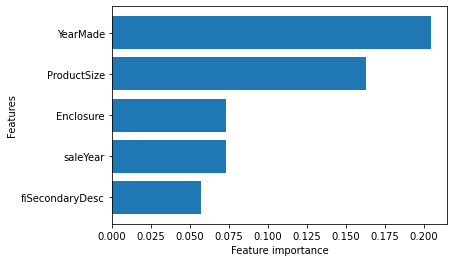

In [84]:
plot_features(X_train.columns, ideal_model.feature_importances_, n=5)